In [164]:
using Revise
using SSMCMain, SSMCMain.ModifiedMiCRM, MLSolver

In [2]:
using CairoMakie, ProgressLogging

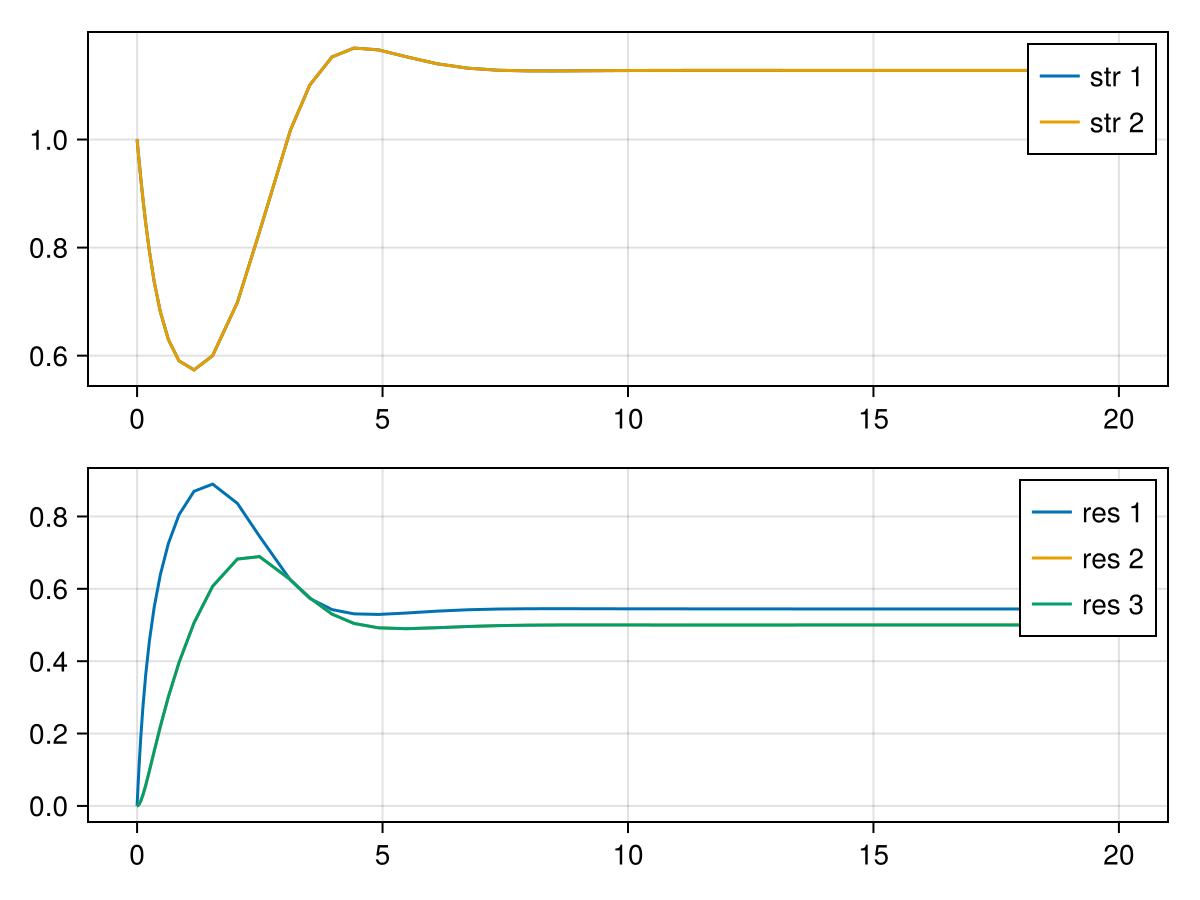

[1.1278338954146732, 1.1278338954146732, 0.5443329980683472, 0.49999970105420233, 0.49999970105420233]

In [156]:
D = fill(0., 2, 3, 3)
D[1,:,:] .= [0. 0. 0.; 0. 0. 0.; 1 0. 0.]
D[2,:,:] .= [0. 0. 0.; 1. 0. 0.; 0. 0. 0.]
p, s = make_solve_plot_return(2,3,20;
    D=SArray{Tuple{2,3,3}}(D),
    K=[3., 0., 0.],
    r=[1., 0.2, 0.2],
    l=[1. 0. 0.; 1. 0. 0.],
    c=[2. 2. 0.; 2. 0. 2.],
    m=[1., 1.],
    u0=[1., 1., 0., 0., 0.],
    u0rand=0.
)
# display(p.p.c)
# display(p.p.D[1,:,:])
# display(p.p.D[2,:,:])
show(s.u[end])
# param_summary(p.p)

In [159]:
symsol = symbolic_solve_ode_ml(p)

┌ Warning: Solve::ratnz: Solve was unable to solve the system with inexact coefficients.
│     The answer was obtained by solving a corresponding exact system and
│     numericizing the result.
└ @ MathLink ~/.julia/packages/MathLink/S39uA/src/eval.jl:16


5-element Vector{Vector{Pair{Symbolics.Num, Symbolics.Num}}}:
 [u1 => 1.1278336096873995, u2 => 1.1278336096873995, u3 => 0.544332780625201, u4 => 0.5, u5 => 0.5]
 [u1 => 0.022166390312600478, u2 => 0.022166390312600478, u3 => 2.755667219374799, u4 => 0.5, u5 => 0.5]
 [u1 => 0.0, u2 => 0.0, u3 => 3.0, u4 => 0.0, u5 => 0.0]
 [u1 => 0.0, u2 => -0.1, u3 => 3.75, u4 => -3.75, u5 => 0.5]
 [u1 => -0.1, u2 => 0.0, u3 => 3.75, u4 => 0.5, u5 => -3.75]

In [158]:
sssol = solve(SteadyStateProblem(p), SSRootfind(GaussNewton()); abstol=1e-18);
show(sssol)

[1.1278336096873995, 1.1278336096873995, 0.544332780625201, 0.5, 0.5]

In [184]:
ks = LinRange(0., 10., 10000)
Ds = [0.0, 0.0, 100., 1., 1.]
usol = sssol.u
# usol = Symbolics.value.(getindex.(symsol[2], 2))
show(uninplace(mmicrmfunc!)(sssol.u, p.p, 0))

[0.0, 0.0, 0.0, 0.0, 0.0]

maximum(real(lambdas)) = 0.032715547922926067


[ Info: we are getting non-zero imaginary parts, max is 0.846461
[ Info: we are getting non-zero imaginary parts, max is 1.782545
[ Info: we are getting non-zero imaginary parts, max is 1.789905


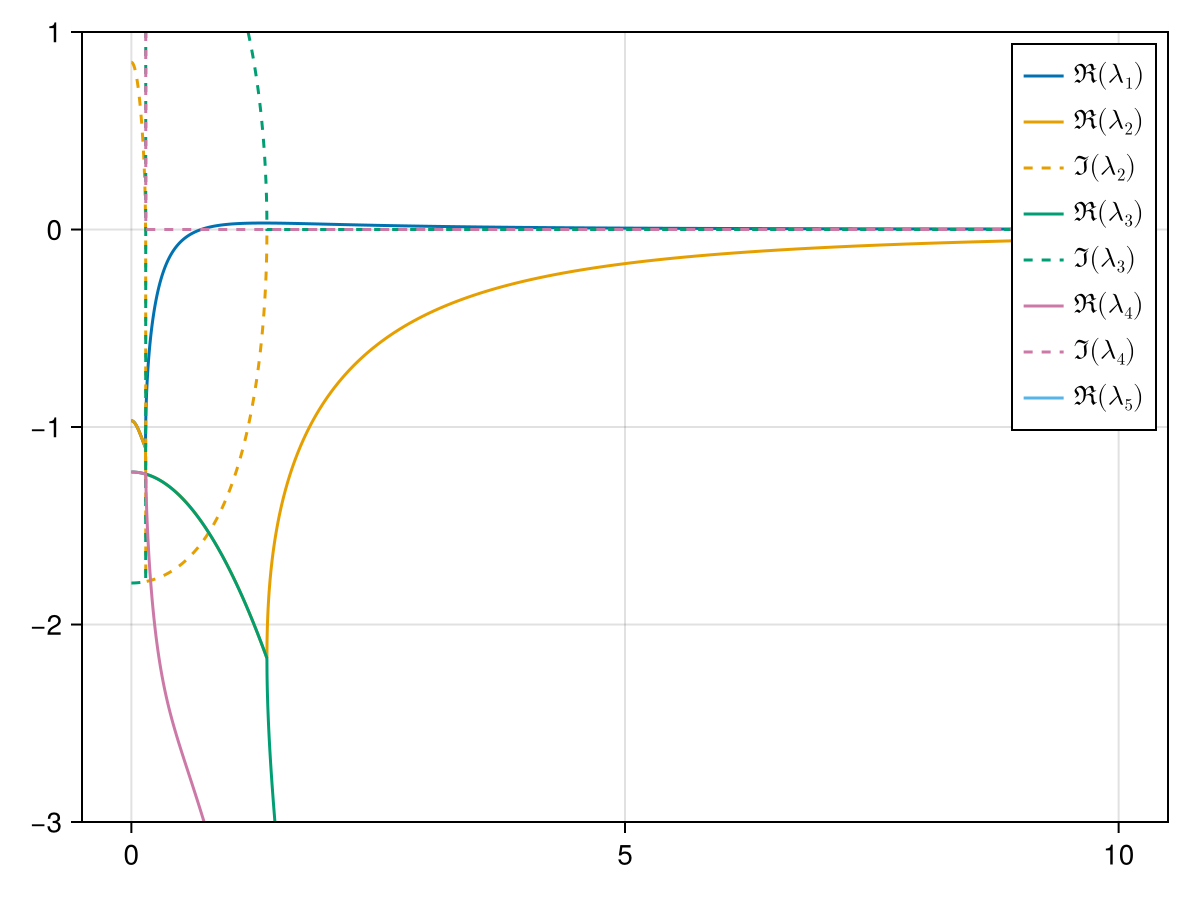

In [189]:
lambdas = do_linstab_for_ks(ks, p, Ds, usol);
@show maximum(real(lambdas))
faa = plot_linstab_lambdas(ks, lambdas)
ylims!(faa.axis, (-3., 1.))
#xlims!(faa.axis, (0., ))
faa

In [182]:
ff = linstab_make_full_func(p.p, usol, Ds)
kmax_i = argmax(maximum.(eachrow(real(lambdas))))
kmax = ks[kmax_i]
kmax_i, kmax

(108, 0.107010701070107)

In [183]:
kmax_es = ff(kmax);
kmax_es.vectors[:,1]

5-element Vector{ComplexF64}:
  0.08769354239897806 + 0.0im
  0.08769354239897817 + 0.0im
 -0.37731011737395703 + 0.0im
   0.6489440501962741 + 0.0im
   0.6489440501962738 + 0.0im